# Walmart Business Case Study

**About Walmart**

Walmart is an American multinational retail corporation that operates a chain of supercenters, discount departmental stores, and grocery stores from the United States. Walmart has more than 100 million customers worldwide.

**Business Problem**

The Management team at Walmart Inc. wants to analyze the customer purchase behavior (specifically, purchase amount) against the customer’s gender and the various other factors to help the business make better decisions. They want to understand if the spending habits differ between male and female customers: Do women spend more on Black Friday than men? (Assume 50 million customers are male and 50 million are female).

**Dataset Overview**

The company collected the transactional data of customers who purchased products from the Walmart Stores during Black Friday. The dataset has the following features:

- User_ID:	User ID
- Product_ID:	Product ID
- Gender:	Sex of User
- Age:	Age in bins
- Occupation:	Occupation(Masked)
- City_Category:	Category of the City (A,B,C)
- StayInCurrentCityYears:	Number of years stay in current city
- Marital_Status:	Marital Status
- ProductCategory:	Product Category (Masked)
- Purchase:	Purchase Amount

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm,binom,geom,expon

In [3]:
data = pd.read_csv(r"C:\Users\n.rahman\OneDrive - BALADNA\Desktop\BALADNA\Ex Docs\SCALER-DSML\Module 7 -Statistics\walmart_data.csv")
data.sample(10)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
405880,1002454,P00147942,M,18-25,0,B,1,0,1,11833
479749,1001866,P00059442,M,26-35,7,A,4+,1,6,16329
158741,1000543,P00359742,M,26-35,5,B,4+,1,1,19194
167592,1001865,P00053042,F,18-25,1,B,2,0,5,5402
458380,1004508,P00151042,M,26-35,20,A,2,0,5,3515
159625,1000702,P00060142,M,36-45,7,B,2,1,8,7756
47643,1001303,P00042742,M,26-35,19,A,4+,0,5,7110
297520,1003829,P00338442,F,26-35,1,B,1,0,1,11666
257282,1003675,P00320442,M,36-45,7,B,3,0,6,20078
109605,1004875,P00172542,M,36-45,0,C,2,0,5,7088


In [4]:
data.shape

(550068, 10)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


### changing the data types to object for those categorical attributes

In [6]:
col = ["User_ID","Occupation","Marital_Status","Product_Category"]

data[col] = data[col].astype("object")

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  object
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  object
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  object
 8   Product_Category            550068 non-null  object
 9   Purchase                    550068 non-null  int64 
dtypes: int64(1), object(9)
memory usage: 42.0+ MB


In [8]:
data.describe()

,Purchase
count,550068.000000
mean,9263.968713
std,5023.065394
min,12.000000
25%,5823.000000
50%,8047.000000
75%,12054.000000
max,23961.000000


In [9]:
data.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

In [10]:
data["Age"].value_counts()

Age
26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: count, dtype: int64

In [11]:
data["Gender"].value_counts()

Gender
M    414259
F    135809
Name: count, dtype: int64

In [12]:
data["Marital_Status"].value_counts()

Marital_Status
0    324731
1    225337
Name: count, dtype: int64

In [13]:
data["Product_ID"].nunique()

3631

In [14]:
data["Product_ID"].value_counts().head()

Product_ID
P00265242    1880
P00025442    1615
P00110742    1612
P00112142    1562
P00057642    1470
Name: count, dtype: int64

In [15]:
data["Product_Category"].nunique()

20

In [16]:
data["Product_Category"].value_counts().head()

Product_Category
5     150933
1     140378
8     113925
11     24287
2      23864
Name: count, dtype: int64

In [17]:
data["City_Category"].nunique()

3

In [18]:
data["City_Category"].value_counts()

City_Category
B    231173
C    171175
A    147720
Name: count, dtype: int64

In [19]:
data["User_ID"].value_counts()

User_ID
1001680    1026
1004277     979
1001941     898
1001181     862
1000889     823
           ... 
1002690       7
1002111       7
1005810       7
1004991       7
1000708       6
Name: count, Length: 5891, dtype: int64

In [20]:
data["User_ID"].nunique()

5891

### Initial Observations:

- There are 550068 entries and 10 columns.
- There were few categorical columns which was in integer datatype converted to object datatype.
- There is some significant difference between the mean and median of purchase amount, indicating the presence of outliers which need to further analysed.
- Min purchase value is 12 and max is 23961, which indicates a significant variability of data in purchase
- From percentile its clear that 75% of purchases are below 12,054.
- No missing values
- Among age category, the no of transactions under 26-35 age group is dominating among all other groups.
- Among gender category, the male gender is dominating among female in number of purchases
- Among marital status, 0(single,divorced,widowed) is dominating more number of purchases than married (1)
- There are 3631 unique product IDs in the dataset. P00265242 is the most sold Product ID.
- There are 20 unique product category in the dataset. Products under Category 5 is the most sold products. 
- There are 3 city category in the dataset. Among which from city B is the most purchases happened.
- In total 5891 unique customer purchase information is there in the data set. Among which we user 1001680 is purchase more number of times. 

## Univariate Analysis for qualitative attributes

In [21]:
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


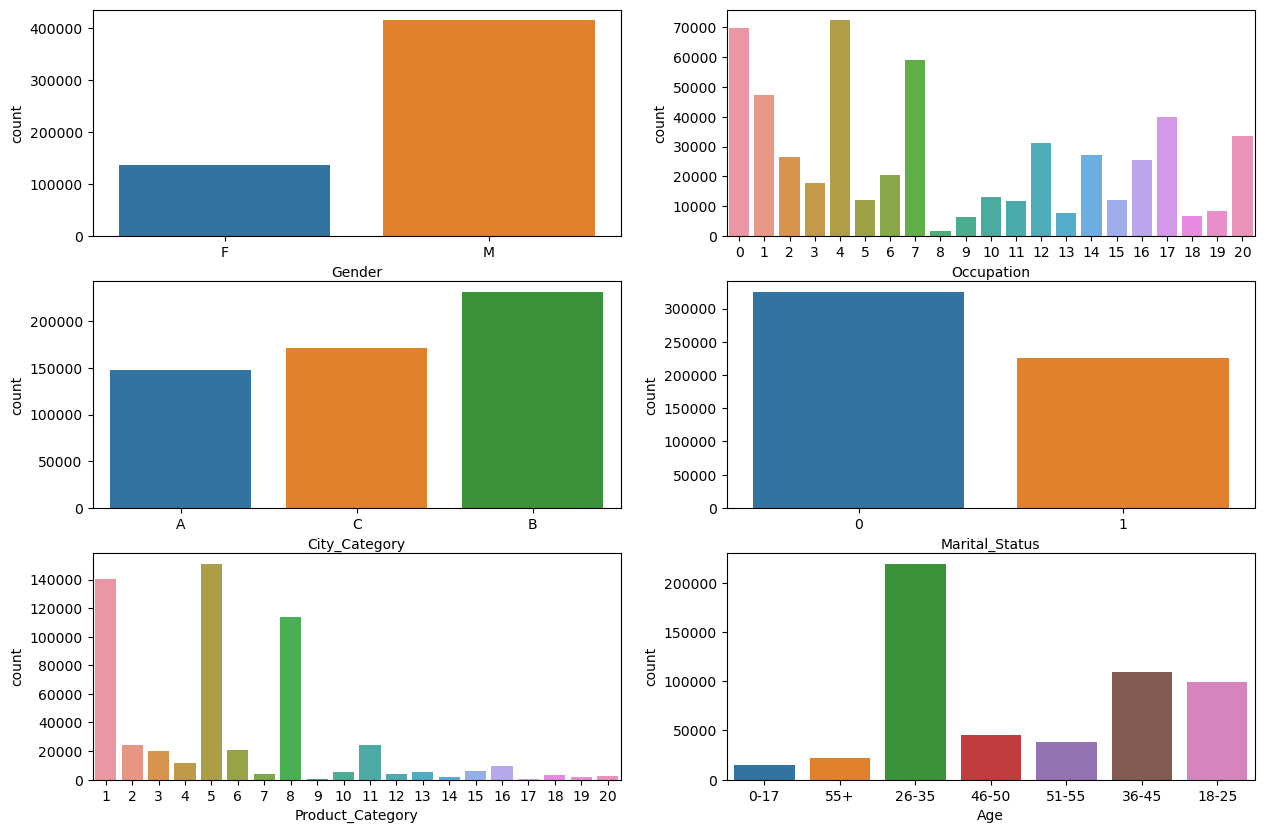

In [22]:
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(15, 10))
sns.countplot(data=data,x="Gender", ax=axs[0,0])
sns.countplot(data=data,x="Occupation",ax = axs[0,1])
sns.countplot(data=data,x="City_Category",ax=axs[1,0])
sns.countplot(data=data,x="Marital_Status",ax=axs[1,1])
sns.countplot(data=data,x="Product_Category",ax = axs[2,0])
sns.countplot(data=data,x="Age",ax = axs[2,1])
plt.show()

**Observation from Univariate Analysis**

- Male groups is purchasing more than females in terms of no of purchases count.
- Among 21 occupations, Occupation category of 4 is dominating among all others in no of purchases followed by occupation 0 and 7.
- City_category B are dominating in no of purchases among other 2
- Single customer purchases are higher than married customers.
- Product Category 5 is dominating the most purchases in numbers followed by category 1 and 8.
- Age group 26-35 is having the highest number of purchase compared to other age groups

## Bivariate Analysis

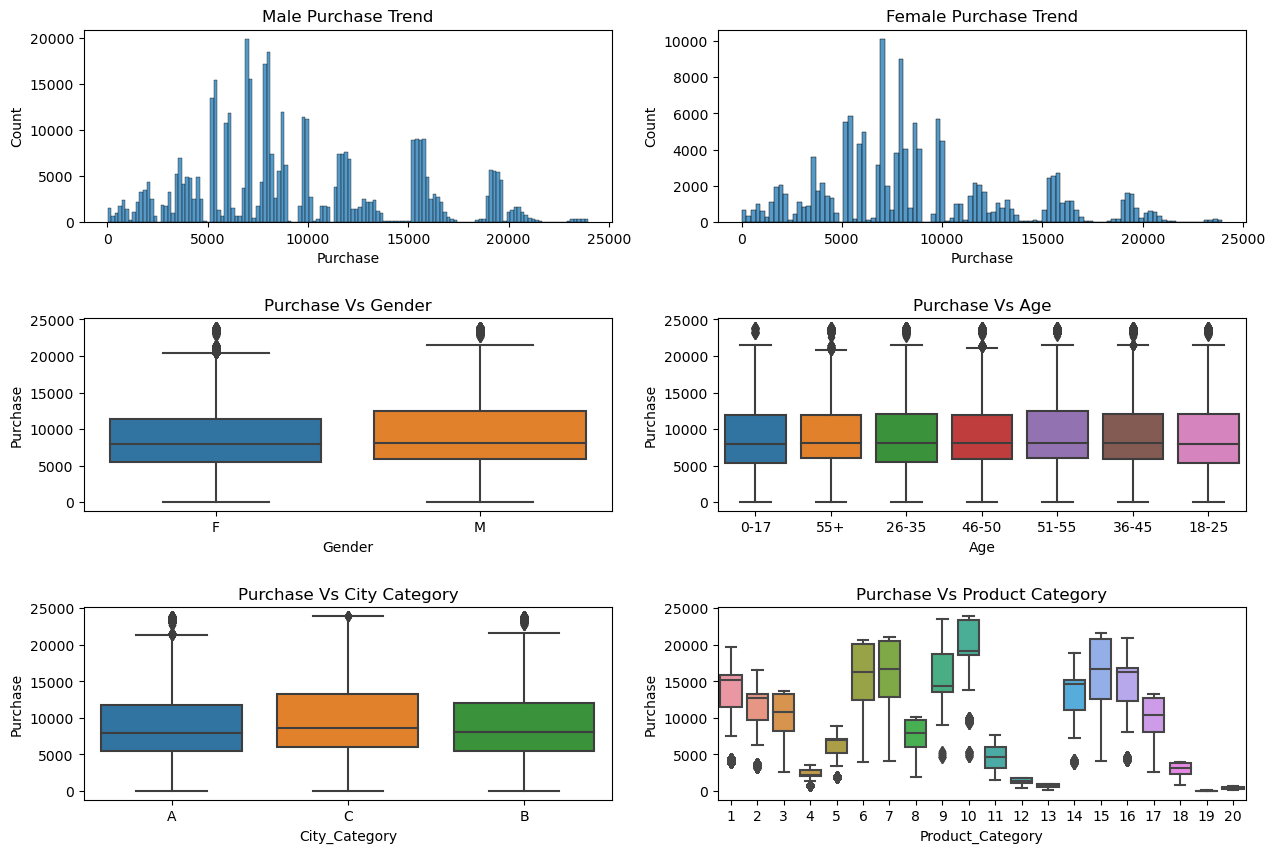

In [23]:
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(15, 10))

#first row
sns.histplot(data=data[data["Gender"]=="M"]["Purchase"],ax = axs[0,0]).set_title("Male Purchase Trend")
sns.histplot(data=data[data["Gender"]=="F"]["Purchase"],ax = axs[0,1]).set_title("Female Purchase Trend")

#second row
sns.boxplot(x=data["Gender"],y=data["Purchase"], ax = axs[1,0]).set_title("Purchase Vs Gender")
sns.boxplot(x=data["Age"],y=data["Purchase"], ax=axs[1,1]).set_title("Purchase Vs Age")

#third row
sns.boxplot(x=data["City_Category"],y=data["Purchase"], ax=axs[2,0]).set_title("Purchase Vs City Category")
sns.boxplot(x=data["Product_Category"],y=data["Purchase"], ax=axs[2,1]).set_title("Purchase Vs Product Category")

fig.subplots_adjust(hspace=0.5)
plt.show()

**Observations**

- From the histplot, we can clearly see spending behaviour is very much similar in nature for both males and females as the maximum purchase count are between the purchase value range of 5000-10000 for both. But, the purchase count are more in case of males.
- Among differnt age categories, we see similar purchase behaviour. For all age groups, most of the purchases are of the values between 5k to 12k with all have some outliers.
- Similarly for City category, we see the users spends mostly in the range of 5k to 12k.There are outliers in all 3 categories as well
- We see variations among product categories. Product category 10 products are the costliest ones. Also, there are few outliers for some of the product categories.


### Outlier Detection

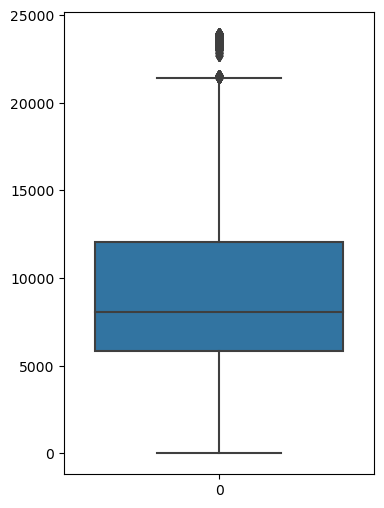

In [275]:
plt.figure(figsize=(4,6))
ot = sns.boxplot(data["Purchase"])
plt.show()

In [156]:
data.describe()

,Purchase
count,550068.000000
mean,9263.968713
std,5023.065394
min,12.000000
25%,5823.000000
50%,8047.000000
75%,12054.000000
max,23961.000000


In [158]:
p_25 = np.percentile(data["Purchase"],25)
p_50 = np.percentile(data["Purchase"],50)
p_75 = np.percentile(data["Purchase"],75)
print(p_25,p_50,p_75)

5823.0 8047.0 12054.0


In [159]:
iqr = p_75- p_25
iqr

6231.0

In [160]:
pur_upper_whisker = p_75 + 1.5*iqr
pur_upper_whisker

21400.5

In [163]:
outliers = data.loc[data["Purchase"]>pur_upper_whisker]
outliers

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
343,1000058,P00117642,M,26-35,2,B,3,0,10,23603
375,1000062,P00119342,F,36-45,3,A,1,0,10,23792
652,1000126,P00087042,M,18-25,9,B,1,0,10,23233
736,1000139,P00159542,F,26-35,20,C,2,0,10,23595
1041,1000175,P00052842,F,26-35,2,B,1,0,10,23341
...,...,...,...,...,...,...,...,...,...,...
544488,1005815,P00116142,M,26-35,20,B,1,0,10,23753
544704,1005847,P00085342,F,18-25,4,B,2,0,10,23724
544743,1005852,P00202242,F,26-35,1,A,0,1,10,23529
545663,1006002,P00116142,M,51-55,0,C,1,1,10,23663


In [164]:
len(outliers)

2677

**Observation**

- There are 2677 purchases which is outliers from the whole data. 

# EDA

In [27]:
pd.crosstab(data["Gender"],data["Age"],margins=True)

Age,0-17,18-25,26-35,36-45,46-50,51-55,55+,All
Gender,,,,,,,,
F,5083,24628,50752,27170,13199,9894,5083,135809
M,10019,75032,168835,82843,32502,28607,16421,414259
All,15102,99660,219587,110013,45701,38501,21504,550068


In [28]:
pd.crosstab(data["Gender"],data["Age"],margins=True,normalize=True)*100

Age,0-17,18-25,26-35,36-45,46-50,51-55,55+,All
Gender,,,,,,,,
F,0.924068,4.477265,9.226496,4.939389,2.399522,1.798687,0.924068,24.689493
M,1.821411,13.640495,30.693478,15.060502,5.908724,5.200630,2.985267,75.310507
All,2.745479,18.117760,39.919974,19.999891,8.308246,6.999316,3.909335,100.000000


In [29]:
df1= data.groupby("Gender")["Purchase"].sum().reset_index()
df1["percent"] = np.round((df1["Purchase"]/df1["Purchase"].sum())*100,2)
df1

,Gender,Purchase,percent
0,F,1186232642,23.28
1,M,3909580100,76.72


**Observation**

- 76% of total purchase amount are from males and 23% of purchase amount are from female. 
- From the gender split also we can see 75% of purchase transactions are from males and 25% are females.  

In [30]:
df2= data.groupby("Age")["Purchase"].sum().reset_index()
df2["percent"] = np.round((df2["Purchase"]/df2["Purchase"].sum())*100,2)
df2.sort_values("percent",ascending=False)

,Age,Purchase,percent
2,26-35,2031770578,39.87
3,36-45,1026569884,20.15
1,18-25,913848675,17.93
4,46-50,420843403,8.26
5,51-55,367099644,7.20
6,55+,200767375,3.94
0,0-17,134913183,2.65


**Observation**

- Around 40% purchase amount is from the age group 26-35 followed by age group 36-45 contributing 20%. Say cumulatively around 78% of purchase amount is from the age group between 18-45. 
- Among 40% of purchases from this group, around 30% transactions are from males and around 10% of transactions are from females.
- Likewise from the age group 36-45 which is contributing 20% of total purchases. Around 15% of purchase count are from males and 5% from females.
- Lowest purchase amount is from the age group 0-17 just contributing 2.65%

-------------------------------------------------------------------------------------------------------------------------

In [31]:
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [32]:
df5= data.groupby("Occupation")["Purchase"].sum().reset_index()
df5["percent"] = np.round((df5["Purchase"]/df5["Purchase"].sum())*100,2)
df5.sort_values("percent",ascending=False).head()

,Occupation,Purchase,percent
4,4,666244484,13.07
0,0,635406958,12.47
7,7,557371587,10.94
1,1,424614144,8.33
17,17,393281453,7.72


**Observation**

- As we knew occupation 4 is dominating in purchase compared to other occupation, its contribution is 13.07%.
- Followed by occupation 0 and 7 contributing 12.47% and 10.94% respectively

----------------------------------------------------------------------------------------------------------------------------

In [33]:
df6= data.groupby("Marital_Status")["Purchase"].sum().reset_index()
df6["percent"] = np.round((df6["Purchase"]/df6["Purchase"].sum())*100,2)
df6.sort_values("percent",ascending=False).head()

,Marital_Status,Purchase,percent
0,0,3008927447,59.05
1,1,2086885295,40.95


**Observation**

- As we already knew the singles are contributing to the total pruchase by 59.05% and Married by 40.95%

In [34]:
pd.crosstab(data["City_Category"],data["Age"],margins=True,normalize=True)*100

Age,0-17,18-25,26-35,36-45,46-50,51-55,55+,All
City_Category,,,,,,,,
A,0.462488,5.005745,13.406524,4.838856,1.382920,1.108772,0.649556,26.854862
B,0.988060,7.862119,16.649578,8.653112,3.709723,3.225238,0.938429,42.026259
C,1.294931,5.249896,9.863871,6.507923,3.215602,2.665307,2.321349,31.118880
All,2.745479,18.117760,39.919974,19.999891,8.308246,6.999316,3.909335,100.000000


In [35]:
df7= data.groupby("City_Category")["Purchase"].sum().reset_index()
df7["percent"] = np.round((df7["Purchase"]/df7["Purchase"].sum())*100,2)
df7.sort_values("percent",ascending=False).head()

,City_Category,Purchase,percent
1,B,2115533605,41.52
2,C,1663807476,32.65
0,A,1316471661,25.83


**Observation**

- Among 3 city categories, category B are contributing to the total purchase in amount by 41.52% followed by category C and then A
- From category B, major purchase is again from the age group of 26-35 and we knew its majorly purchased by males first and then females

In [36]:
df8= data.groupby("Product_Category")["Purchase"].sum().reset_index()
df8["percent"] = np.round((df8["Purchase"]/df8["Purchase"].sum())*100,2)
df8.sort_values("percent",ascending=False).head()

,Product_Category,Purchase,percent
0,1,1910013754,37.48
4,5,941835229,18.48
7,8,854318799,16.77
5,6,324150302,6.36
1,2,268516186,5.27


**Observation**

- From product category we saw the major product lines being purchased in numbers was 5, but in terms of total purchasing amount, the major contribution is coming from product category 1 followed by 5 and 8.

In [37]:
df9= data.groupby("Stay_In_Current_City_Years")["Purchase"].sum().reset_index()
df9["percent"] = np.round((df9["Purchase"]/df9["Purchase"].sum())*100,2)
df9.sort_values("percent",ascending=False).head()

,Stay_In_Current_City_Years,Purchase,percent
1,1,1792872533,35.18
2,2,949173931,18.63
3,3,884902659,17.37
4,4+,785884390,15.42
0,0,682979229,13.40


---------------------------------------------------------------------------------------------------------------------------

### Hypothesis Testing - Performing the hypothesis test to validate whether there is significant difference between men and women on spending. Testing the for any significance by confidence level of 99%, or alpha = 0.01

In [38]:
from scipy.stats import ttest_ind

In [39]:
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [40]:
data.groupby("Gender")["Purchase"].mean()

Gender
F    8734.565765
M    9437.526040
Name: Purchase, dtype: float64

In [41]:
df_male = data.loc[data["Gender"]=="M"]["Purchase"]
df_female = data.loc[data["Gender"]=="F"]["Purchase"]

#framing the hypothesis

- H0: There is no significant difference between the average spending between men and women male = female
- Ha: There is significant difference, the average spend of men is greater thane women male > female

In [42]:
alpha = 0.01
t_stat,p_value = ttest_ind(df_male,df_female, alternative = "greater")
print("t-statistics = ",t_stat)
print("p_value = ",p_value)

t-statistics =  44.837957934353966
p_value =  0.0


In [43]:
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in spending between men and women.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in spending between men and women.")

Reject the null hypothesis: There is a significant difference in spending between men and women.


**Observation**

- So by 99% confidence we can say that the men purchases more than females and there is significant difference in there spending.
- Also we see before the hypothetical testing the average spend of men is greater than female. This is what being proved using two sample t-test hypothesis testing, hence rejecting the null hypothesis and accepting the there is significant difference. 

In [44]:
data["User_ID"].nunique()

5891

In [45]:
data.groupby(["Gender"])["User_ID"].nunique().reset_index()

,Gender,User_ID
0,F,1666
1,M,4225


--------------------------------------------------------------------------------------------------------------------------

## Applying CLT on male and female purchases

In [46]:
df_male = data.loc[data["Gender"]=="M"]["Purchase"]
male_mean = df_male.mean() #male purchase mean of population
male_mean

9437.526040472265

In [47]:
df_female = data.loc[data["Gender"]=="F"]["Purchase"]
female_mean = df_female.mean() #female purchase mean of population
female_mean

8734.565765155476

In [48]:
male_std = df_male.std() #male population standard deviation
male_std

5092.186209777949

In [49]:
female_std = df_female.std() #female population standard deviation
female_std

4767.233289291444

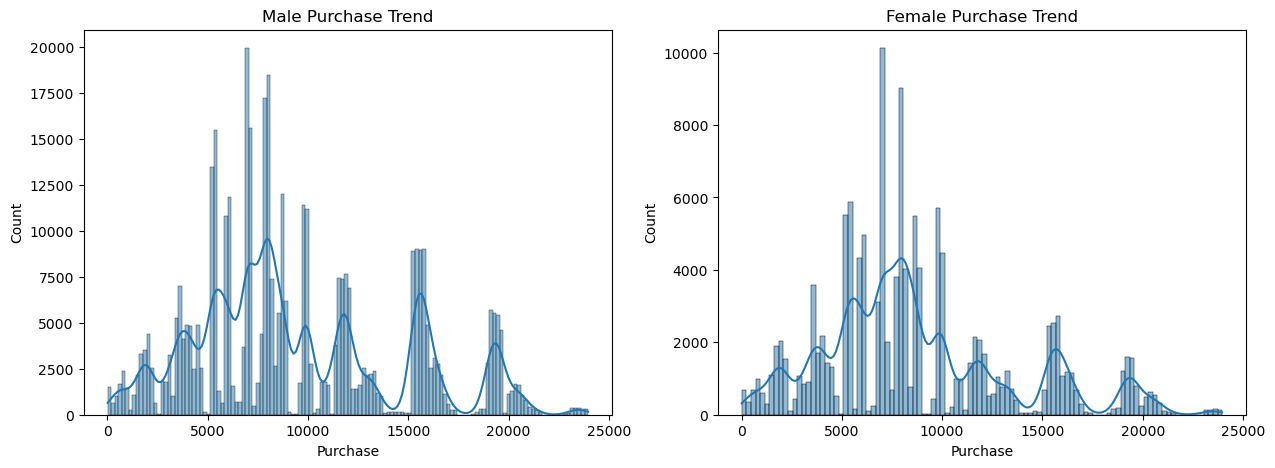

In [50]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

#histogram for the population distribution for both male and female
sns.histplot(data=data[data["Gender"]=="M"]["Purchase"],ax = axs[0],kde=True).set_title("Male Purchase Trend")
sns.histplot(data=data[data["Gender"]=="F"]["Purchase"],ax = axs[1],kde=True).set_title("Female Purchase Trend")
plt.show()

**Observation**

- We can clearly see that shape of the population distribution is not completely say normal distribution, its slightly skewed on to the right.
- Also evident that in terms of purchase counts, male is dominating females.

### Sample Size n = 500

In [51]:
#male sampling distribution for n =500 and repeating 1000 times
male_s_500 = [np.mean(df_male.sample(500)) for i in range(1000)]
male_s_500[0:10]

[9245.372,
 9677.474,
 9362.746,
 9408.052,
 9561.712,
 9319.108,
 9309.066,
 9283.394,
 9412.46,
 9654.944]

In [52]:
#female sampling distribution for n =500 and repeating 1000 times
female_s_500 = [np.mean(df_female.sample(500)) for i in range(1000)]
female_s_500[0:10]

[8628.6,
 8662.5,
 8456.088,
 8942.698,
 8960.546,
 8910.712,
 8564.726,
 8677.556,
 8738.792,
 8591.01]

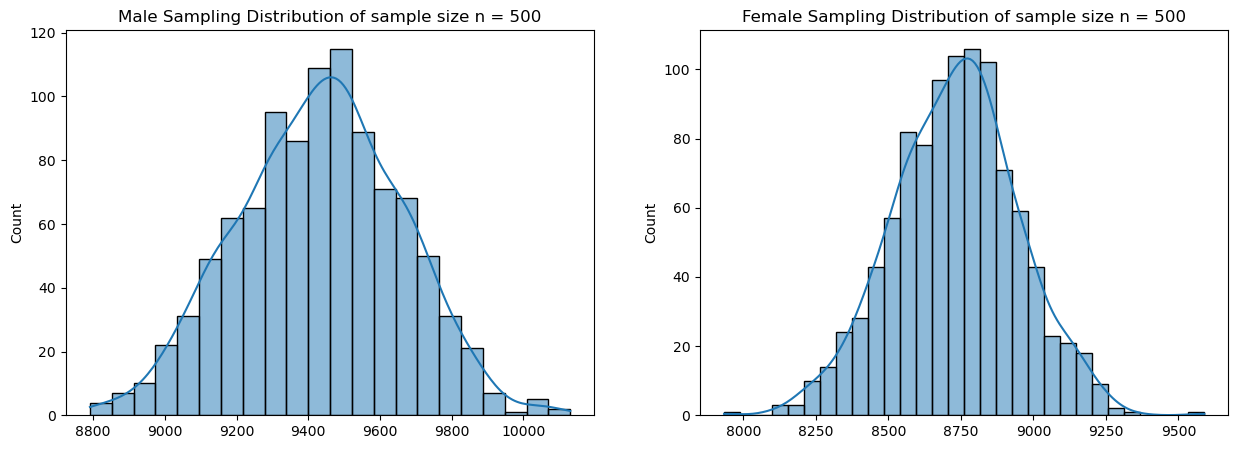

In [53]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
sns.histplot(male_s_500,kde=True, ax=axs[0]).set_title("Male Sampling Distribution of sample size n = 500")
sns.histplot(female_s_500,kde=True, ax=axs[1]).set_title("Female Sampling Distribution of sample size n = 500")
plt.show()

In [54]:
#mean of sampling distribution for both male and female

ms = np.mean(male_s_500)
print("Male sampling distribution mean = ",np.round(ms,2))

fs = np.mean(female_s_500)
print("Female sampling distribution mean = ",np.round(fs,2))


msds = np.std(male_s_500)
print("Male sampling distribution Standard Deviation = ",np.round(msds,2))

fsds = np.std(female_s_500)
print("Female sampling distribution Standard Deviation = ",np.round(fsds,2))


Male sampling distribution mean =  9432.3
Female sampling distribution mean =  8732.27
Male sampling distribution Standard Deviation =  226.3
Female sampling distribution Standard Deviation =  216.2


**Observation**

- For sample size n =500, the distribution for both male and female follows a normal distribution as per CLT.
- We can conclude that the distribution of those 500 samples means is normally distributed and most of the values lies between 9100-9900 for males and 8200-9100 for females
- Mean of sampling distribution for both male and female are nearly estimating the true population mean.
- Male - Most of the values lies between 9300-9500
- Female - Most of the values lies between 8700-8800
- So from sampling distribution its evident that male spend more than women in purchases
- As the sample size increases, the CLT becomes more applicable, and the standard deviation decreases, making the estimates of population parameters more reliable.
-  By increasing the size of the sample, the variability or SD of the sample distributions decreases and the sample mean tends to be much closer to the population mean.

### Sample Size n=1000

In [55]:
#male sampling distribution for n =1000 and repeating 1000 times
male_s_1000 = [np.mean(df_male.sample(1000)) for i in range(1000)]
male_s_1000[0:10]

[9246.273,
 9303.769,
 9538.051,
 9563.418,
 9391.903,
 9707.737,
 9489.761,
 9697.007,
 9267.488,
 9659.327]

In [56]:
#female sampling distribution for n =1000 and repeating 1000 times
female_s_1000 = [np.mean(df_female.sample(1000)) for i in range(1000)]
female_s_1000[0:10]

[8720.331,
 8683.883,
 8613.657,
 8810.05,
 8666.461,
 8636.027,
 8659.73,
 8389.661,
 8875.032,
 8724.837]

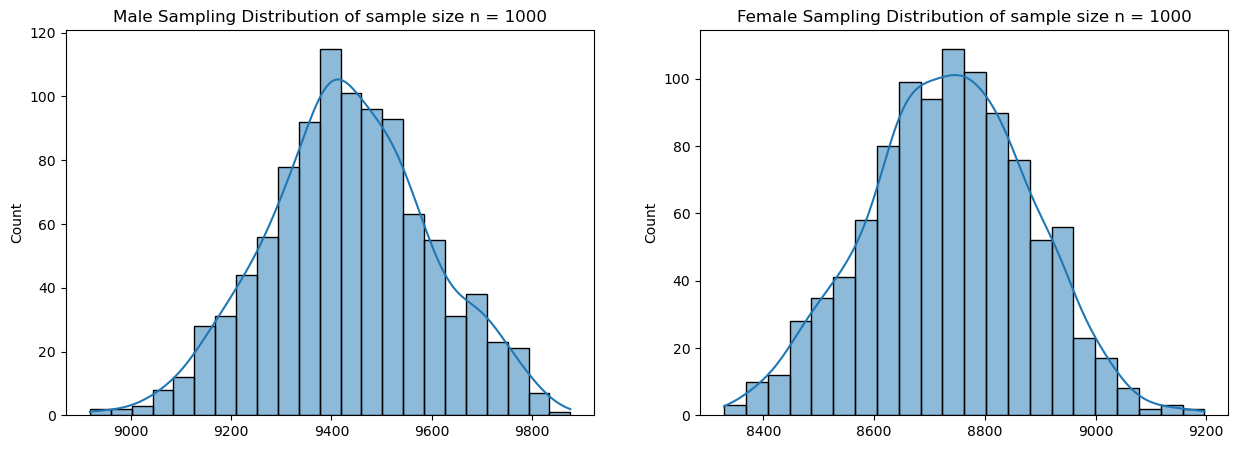

In [57]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
sns.histplot(male_s_1000,kde=True, ax=axs[0]).set_title("Male Sampling Distribution of sample size n = 1000")
sns.histplot(female_s_1000,kde=True, ax=axs[1]).set_title("Female Sampling Distribution of sample size n = 1000")
plt.show()

In [58]:
#mean of sampling distribution for both male and female

ms = np.mean(male_s_1000)
print("Male sampling distribution mean = ",np.round(ms,2))

fs = np.mean(female_s_1000)
print("Female sampling distribution mean = ",np.round(fs,2))


msds = np.std(male_s_1000)
print("Male sampling distribution Standard Deviation = ",np.round(msds,2))

fsds = np.std(female_s_1000)
print("Female sampling distribution Standard Deviation = ",np.round(fsds,2))


Male sampling distribution mean =  9433.96
Female sampling distribution mean =  8734.84
Male sampling distribution Standard Deviation =  162.47
Female sampling distribution Standard Deviation =  146.76


**Observation**

- For sample size n =1000, the distribution for both male and female follows a normal distribution as per CLT.
- Mean of sampling distribution for both male and female are now very much near close to the true population mean.
- As we increase the sample size from 500 to 1000, we see that the distribution of those 1000 samples means is normally distributed and most of the values lies between 9200-9700 for males and 8500-900 for females.
- As the sample size increases, the CLT becomes more applicable, and the standard deviation decreases, making the estimates of population parameters more reliable.
-  By increasing the size of the sample, the variability or SD of the sample distributions decreases and the sample mean tends to be much closer to the population mean.

### Calculation of confidence intervals (purchases by gender) with 90%, 95% and 99% confidence levels 

In [110]:
z90 = norm.ppf(0.05)
z95 = norm.ppf(0.025)
z99 = norm.ppf(0.005)

print(z90,z95,z99)

-1.6448536269514729 -1.9599639845400545 -2.575829303548901


In [120]:
#male purchase population mean
df_male = data.loc[data["Gender"]=="M"]["Purchase"]
male_mean = df_male.mean() 

#female purchase population mean
df_female = data.loc[data["Gender"]=="F"]["Purchase"]
female_mean = df_female.mean() 


#male population standard deviation
male_std = df_male.std()
male_std

#female population standard deviation
female_std = df_female.std()
female_std

print("Male population mean = ", male_mean)
print("Female population mean = ", female_mean)
print("Male population standard deviation = ", male_std)
print("Female population standard deviation = ", female_std)

Male population mean =  9437.526040472265
Female population mean =  8734.565765155476
Male population standard deviation =  5092.186209777949
Female population standard deviation =  4767.233289291444


### CI for sample size n = 500

In [112]:
#sampling male for n =500 and calculating the sample mean
male_500 = data.loc[data["Gender"]=="M"]["Purchase"].sample(500)
xbar_male = male_500.mean()

#sampling female for n =500 and calculating the sample mean
female_500 = data.loc[data["Gender"]=="F"]["Purchase"].sample(500)
xbar_female = female_500.mean()

print("Single sample mean for male for size n=500 = ", xbar_male)
print("Single sample mean for female for size n=500 = ", xbar_female)

Single sample mean for male for size n=500 =  9436.154
Single sample mean for female for size n=500 =  8446.43


In [113]:
#calculating the standard error for male
n=500
se_male = male_std/np.sqrt(n)

#calculating the standard error for female

se_female = female_std/np.sqrt(n)

print("Standard Error for Male=", se_male)
print("Standard Error for Female=", se_female)

Standard Error for Male= 227.72949038300996
Standard Error for Female= 213.19715398911177


In [114]:
#calculating the confidence interval for male for all confidence levels

lower_bound, upper_bound = (xbar_male + (-1.644)*se_male, xbar_male + (1.64)*se_male)
print(f"By 90% confident,the confidence interval for male true population purchase mean is between {np.round(lower_bound,2)} & {np.round(upper_bound,2)}")

lower_bound, upper_bound = (xbar_male + (-1.959)*se_male, xbar_male + (1.959)*se_male)
print(f"By 95% confident,the confidence interval for male true population purchase mean is between {np.round(lower_bound,2)} & {np.round(upper_bound,2)}")

lower_bound, upper_bound = (xbar_male + (-2.575)*se_male, xbar_male + (2.575)*se_male)
print(f"By 99% confident,the confidence interval for male true population purchase mean is between {np.round(lower_bound,2)} & {np.round(upper_bound,2)}")


By 90% confident,the confidence interval for male true population purchase mean is between 9061.77 & 9809.63
By 95% confident,the confidence interval for male true population purchase mean is between 8990.03 & 9882.28
By 99% confident,the confidence interval for male true population purchase mean is between 8849.75 & 10022.56


In [115]:
#calculating the confidence interval for female for all confidence levels

lower_bound, upper_bound = (xbar_female + (-1.644)*se_female, xbar_female + (1.64)*se_female)
print(f"By 90% confident,the confidence interval for female true population purchase mean is between {np.round(lower_bound,2)} & {np.round(upper_bound,2)}")

lower_bound, upper_bound = (xbar_female + (-1.959)*se_female, xbar_female + (1.959)*se_female)
print(f"By 95% confident,the confidence interval for female true population purchase mean is between {np.round(lower_bound,2)} & {np.round(upper_bound,2)}")

lower_bound, upper_bound = (xbar_female + (-2.575)*se_female, xbar_female + (2.575)*se_female)
print(f"By 99% confident,the confidence interval for female true population purchase mean is between {np.round(lower_bound,2)} & {np.round(upper_bound,2)}")


By 90% confident,the confidence interval for female true population purchase mean is between 8095.93 & 8796.07
By 95% confident,the confidence interval for female true population purchase mean is between 8028.78 & 8864.08
By 99% confident,the confidence interval for female true population purchase mean is between 7897.45 & 8995.41


### CI for sample size n = 1000

In [121]:
#sampling male for n =1000 and calculating the sample mean
male_1000 = data.loc[data["Gender"]=="M"]["Purchase"].sample(1000)
xbar_male = male_1000.mean()

#sampling female for n =1000 and calculating the sample mean
female_1000 = data.loc[data["Gender"]=="F"]["Purchase"].sample(1000)
xbar_female = female_1000.mean()

print("Single sample mean for male for size n=1000 = ", xbar_male)
print("Single sample mean for female for size n=1000 = ", xbar_female)

Single sample mean for male for size n=1000 =  9560.371
Single sample mean for female for size n=1000 =  8681.7


In [122]:
#calculating the standard error for male
n=1000
se_male = male_std/np.sqrt(n)

#calculating the standard error for female

se_female = female_std/np.sqrt(n)

print("Standard Error for Male=", se_male)
print("Standard Error for Female=", se_female)

Standard Error for Male= 161.02906692598302
Standard Error for Female= 150.75315331537354


In [123]:
#calculating the confidence interval for male for all confidence level

lower_bound, upper_bound = (xbar_male + (-1.644)*se_male, xbar_male + (1.64)*se_male)
print(f"By 90% confident,the confidence interval for male true population purchase mean is between {np.round(lower_bound,2)} & {np.round(upper_bound,2)}")

lower_bound, upper_bound = (xbar_male + (-1.959)*se_male, xbar_male + (1.959)*se_male)
print(f"By 95% confident,the confidence interval for male true population purchase mean is between {np.round(lower_bound,2)} & {np.round(upper_bound,2)}")

lower_bound, upper_bound = (xbar_male + (-2.575)*se_male, xbar_male + (2.575)*se_male)
print(f"By 99% confident,the confidence interval for male true population purchase mean is between {np.round(lower_bound,2)} & {np.round(upper_bound,2)}")


By 90% confident,the confidence interval for male true population purchase mean is between 9295.64 & 9824.46
By 95% confident,the confidence interval for male true population purchase mean is between 9244.92 & 9875.83
By 99% confident,the confidence interval for male true population purchase mean is between 9145.72 & 9975.02


In [124]:
#calculating the confidence interval for female for all confidence levels

lower_bound, upper_bound = (xbar_female + (-1.644)*se_female, xbar_female + (1.64)*se_female)
print(f"By 90% confident,the confidence interval for female true population purchase mean is between {np.round(lower_bound,2)} & {np.round(upper_bound,2)}")

lower_bound, upper_bound = (xbar_female + (-1.959)*se_female, xbar_female + (1.959)*se_female)
print(f"By 95% confident,the confidence interval for female true population purchase mean is between {np.round(lower_bound,2)} & {np.round(upper_bound,2)}")

lower_bound, upper_bound = (xbar_female + (-2.575)*se_female, xbar_female + (2.575)*se_female)
print(f"By 99% confident,the confidence interval for female true population purchase mean is between {np.round(lower_bound,2)} & {np.round(upper_bound,2)}")


By 90% confident,the confidence interval for female true population purchase mean is between 8433.86 & 8928.94
By 95% confident,the confidence interval for female true population purchase mean is between 8386.37 & 8977.03
By 99% confident,the confidence interval for female true population purchase mean is between 8293.51 & 9069.89


### CI for sample size n = 2000

In [126]:
#sampling male for n =2000 and calculating the sample mean
male_2000 = data.loc[data["Gender"]=="M"]["Purchase"].sample(2000)
xbar_male = male_2000.mean()

#sampling female for n =2000 and calculating the sample mean
female_2000 = data.loc[data["Gender"]=="F"]["Purchase"].sample(2000)
xbar_female = female_2000.mean()

print("Single sample mean for male for size n=2000 = ", xbar_male)
print("Single sample mean for female for size n=2000 = ", xbar_female)

Single sample mean for male for size n=2000 =  9373.5415
Single sample mean for female for size n=2000 =  8765.5795


In [129]:
#calculating the standard error for male
n=2000
se_male = male_std/np.sqrt(n)

#calculating the standard error for female

se_female = female_std/np.sqrt(n)

print("Standard Error for Male=", se_male)
print("Standard Error for Female=", se_female)

Standard Error for Male= 113.86474519150498
Standard Error for Female= 106.59857699455588


In [130]:
#calculating the confidence interval for male for all confidence level

lower_bound, upper_bound = (xbar_male + (-1.644)*se_male, xbar_male + (1.64)*se_male)
print(f"By 90% confident,the confidence interval for male true population purchase mean is between {np.round(lower_bound,2)} & {np.round(upper_bound,2)}")

lower_bound, upper_bound = (xbar_male + (-1.959)*se_male, xbar_male + (1.959)*se_male)
print(f"By 95% confident,the confidence interval for male true population purchase mean is between {np.round(lower_bound,2)} & {np.round(upper_bound,2)}")

lower_bound, upper_bound = (xbar_male + (-2.575)*se_male, xbar_male + (2.575)*se_male)
print(f"By 99% confident,the confidence interval for male true population purchase mean is between {np.round(lower_bound,2)} & {np.round(upper_bound,2)}")


By 90% confident,the confidence interval for male true population purchase mean is between 9186.35 & 9560.28
By 95% confident,the confidence interval for male true population purchase mean is between 9150.48 & 9596.6
By 99% confident,the confidence interval for male true population purchase mean is between 9080.34 & 9666.74


In [131]:
#calculating the confidence interval for female for all confidence levels

lower_bound, upper_bound = (xbar_female + (-1.644)*se_female, xbar_female + (1.64)*se_female)
print(f"By 90% confident,the confidence interval for female true population purchase mean is between {np.round(lower_bound,2)} & {np.round(upper_bound,2)}")

lower_bound, upper_bound = (xbar_female + (-1.959)*se_female, xbar_female + (1.959)*se_female)
print(f"By 95% confident,the confidence interval for female true population purchase mean is between {np.round(lower_bound,2)} & {np.round(upper_bound,2)}")

lower_bound, upper_bound = (xbar_female + (-2.575)*se_female, xbar_female + (2.575)*se_female)
print(f"By 99% confident,the confidence interval for female true population purchase mean is between {np.round(lower_bound,2)} & {np.round(upper_bound,2)}")


By 90% confident,the confidence interval for female true population purchase mean is between 8590.33 & 8940.4
By 95% confident,the confidence interval for female true population purchase mean is between 8556.75 & 8974.41
By 99% confident,the confidence interval for female true population purchase mean is between 8491.09 & 9040.07


### Observations

- Above we calculated the confidence intervals of true population mean of purchase spend by men and women by taking sample size of n = 500, 1000 amd 2000.
- Its very much evident that as samples size increases the margin of error decreases and confidence intervals gets narrower.
- Confidence interval for both men and women gets narrower from lower to upper bound when the sample size increases.
- As we see there is no overlapping between the men and women spend in terms of confidence level calculated for 90%, 95% and 99%.
- Interval limits of women is less than men.
- So this sample confidence intervals for different confidence levels can be used for estimating the higher population records.

## Calculation of confidence intervals (purchases by marital status) with 90%, 95% and 99% confidence levels 

#### Applying CLT on purchases by marital status

In [146]:
#married purchase population mean
df_married = data.loc[data["Marital_Status"]==1]["Purchase"]
married_mean = df_married.mean() 

#single purchase population mean
df_single = data.loc[data["Marital_Status"]==0]["Purchase"]
single_mean = df_single.mean()

#married population standard deviation
married_std = df_married.std()

#single population standard deviation
single_std = df_single.std()


print("Purchase Population Mean for Married = ",np.round(married_mean,2))
print("Purchase Population Mean for Single = ",np.round(single_mean,2))
print("Purchase Population SD for Married = ",np.round(married_std,2))
print("Purchase Population SD for Single = ",np.round(single_std,2))

Purchase Population Mean for Married =  9261.17
Purchase Population Mean for Single =  9265.91
Purchase Population SD for Married =  5016.9
Purchase Population SD for Single =  5027.35


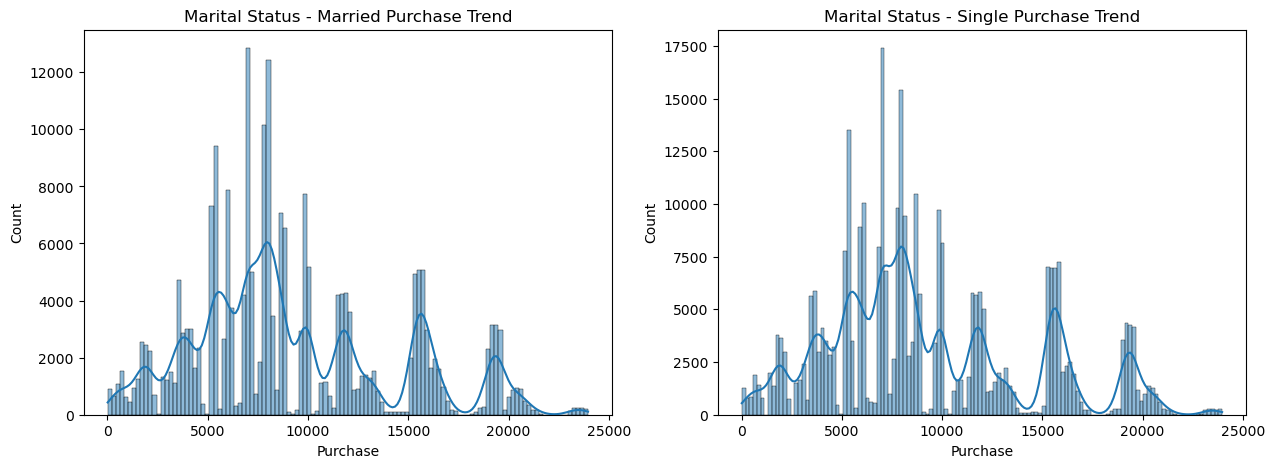

In [147]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

#histogram for the population distribution for both male and female
sns.histplot(data=data[data["Marital_Status"]==1]["Purchase"],ax = axs[0],kde=True).set_title("Marital Status - Married Purchase Trend")
sns.histplot(data=data[data["Marital_Status"]==0]["Purchase"],ax = axs[1],kde=True).set_title("Marital Status - Single Purchase Trend")
plt.show()

#### Sampling for sample size n=1000

In [148]:
#male sampling distribution for n =1000 and repeating 1000 times
married_s_1000 = [np.mean(df_married.sample(1000)) for i in range(1000)]
married_s_1000[0:10]

[9320.382,
 9244.041,
 9583.555,
 9350.008,
 8820.746,
 9432.61,
 9398.406,
 9469.905,
 9328.44,
 9421.843]

In [149]:
#female sampling distribution for n =1000 and repeating 1000 times
single_s_1000 = [np.mean(df_single.sample(1000)) for i in range(1000)]
single_s_1000[0:10]

[9261.337,
 9404.835,
 9406.042,
 9297.81,
 9552.248,
 9176.631,
 9006.024,
 9276.957,
 9215.563,
 9498.358]

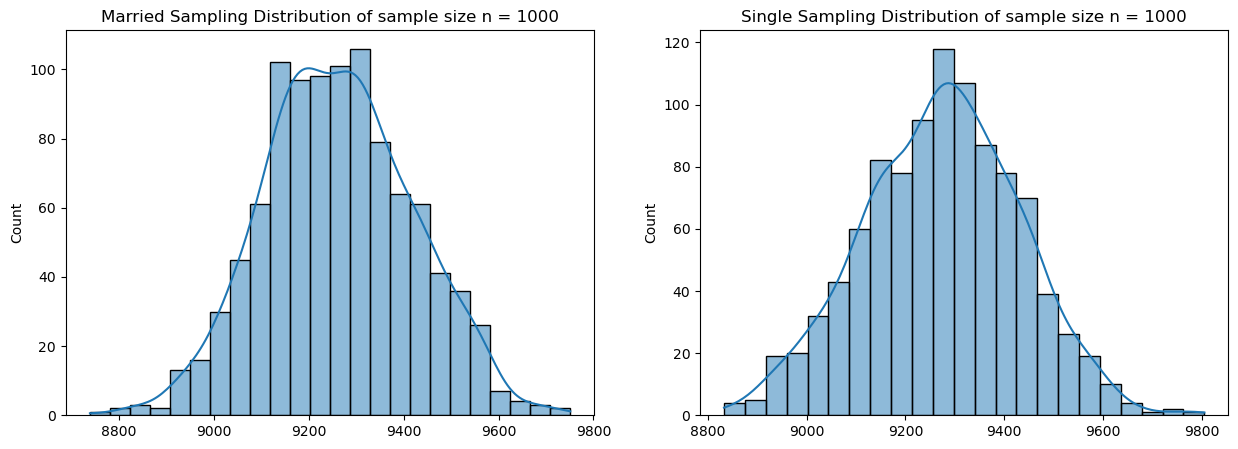

In [150]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
sns.histplot(married_s_1000,kde=True, ax=axs[0]).set_title("Married Sampling Distribution of sample size n = 1000")
sns.histplot(single_s_1000,kde=True, ax=axs[1]).set_title("Single Sampling Distribution of sample size n = 1000")
plt.show()

In [151]:
#mean of sampling distribution for both married and single

ms = np.mean(married_s_1000)
print("Married sampling distribution mean = ",np.round(ms,2))

ss = np.mean(single_s_1000)
print("Single sampling distribution mean = ",np.round(ss,2))


msds = np.std(married_s_1000)
print("Married sampling distribution Standard Deviation = ",np.round(msds,2))

ssds = np.std(single_s_1000)
print("Single sampling distribution Standard Deviation = ",np.round(ssds,2))


Married sampling distribution mean =  9262.02
Single sampling distribution mean =  9272.84
Married sampling distribution Standard Deviation =  156.67
Single sampling distribution Standard Deviation =  157.16


**Observation**

- For sample size n =1000, the distribution for both married and single follows a normal distribution as per CLT.
- Mean of sampling distribution for both marital status are now very much near close to the true population mean.
- As we increase the sample size, we see that the distribution of those 1000 samples means is normally distributed and most of the values lies between 9000-9500 for married and 9000-9500 for singles.
-  By increasing the size of the sample, the variability or SD of the sample distributions decreases and the sample mean tends to be much closer to the population mean.
- Its evident that purchase spend by marital status are similar in trend and its not alike gender factor. Spending is almost the same for both living married and single

### CI for sample size n = 1000

In [152]:
#sampling married for n =1000 and calculating the sample mean
married_1000 = data.loc[data["Marital_Status"]==1]["Purchase"].sample(1000)
xbar_married = married_1000.mean()

#sampling single for n =1000 and calculating the sample mean
single_1000 = data.loc[data["Marital_Status"]==0]["Purchase"].sample(1000)
xbar_single = single_1000.mean()

print("Random sample mean purchases for married for size n=1000 = ", xbar_married)
print("Random sample mean purchases for single for size n=1000 = ", xbar_single)

Random sample mean purchases for married for size n=1000 =  9170.357
Random sample mean purchases for single for size n=1000 =  9288.702


In [153]:
#calculating the standard error for married
n=1000
se_married = married_std/np.sqrt(n)

#calculating the standard error for single

se_single = single_std/np.sqrt(n)

print("Standard Error for Married=", se_married)
print("Standard Error for Single=", se_single)

Standard Error for Married= 158.64822501152537
Standard Error for Single= 158.97869823381575


In [154]:
#calculating the confidence interval for married for all confidence level

lower_bound, upper_bound = (xbar_married + (-1.644)*se_married, xbar_married + (1.64)*se_married)
print(f"By 90% confident,the confidence interval for married true population purchase mean is between {np.round(lower_bound,2)} & {np.round(upper_bound,2)}")

lower_bound, upper_bound = (xbar_married + (-1.959)*se_married, xbar_married + (1.959)*se_married)
print(f"By 95% confident,the confidence interval for married true population purchase mean is between {np.round(lower_bound,2)} & {np.round(upper_bound,2)}")

lower_bound, upper_bound = (xbar_married + (-2.575)*se_married, xbar_married + (2.575)*se_married)
print(f"By 99% confident,the confidence interval for married true population purchase mean is between {np.round(lower_bound,2)} & {np.round(upper_bound,2)}")


By 90% confident,the confidence interval for married true population purchase mean is between 8909.54 & 9430.54
By 95% confident,the confidence interval for married true population purchase mean is between 8859.57 & 9481.15
By 99% confident,the confidence interval for married true population purchase mean is between 8761.84 & 9578.88


In [155]:
#calculating the confidence interval for single for all confidence level

lower_bound, upper_bound = (xbar_single + (-1.644)*se_single, xbar_single + (1.64)*se_single)
print(f"By 90% confident,the confidence interval for single true population purchase mean is between {np.round(lower_bound,2)} & {np.round(upper_bound,2)}")

lower_bound, upper_bound = (xbar_single + (-1.959)*se_single, xbar_single + (1.959)*se_single)
print(f"By 95% confident,the confidence interval for single true population purchase mean is between {np.round(lower_bound,2)} & {np.round(upper_bound,2)}")

lower_bound, upper_bound = (xbar_single + (-2.575)*se_single, xbar_single + (2.575)*se_single)
print(f"By 99% confident,the confidence interval for single true population purchase mean is between {np.round(lower_bound,2)} & {np.round(upper_bound,2)}")


By 90% confident,the confidence interval for single true population purchase mean is between 9027.34 & 9549.43
By 95% confident,the confidence interval for single true population purchase mean is between 8977.26 & 9600.14
By 99% confident,the confidence interval for single true population purchase mean is between 8879.33 & 9698.07


### Observations

- Above we calculated the confidence intervals of true population mean of purchase spend by married and single by taking sample size of n = 1000.
- Its very much evident that as samples size increases the margin of error decreases and confidence intervals gets narrower.
- Confidence interval for both married and single gets narrower from lower to upper bound when the sample size increases.
- As we see there is overlapping between the married and single spend in terms of confidence level calculated for 90%, 95% and 99%.
- So this sample confidence intervals for different confidence levels can be used for estimating the higher population records.

## Calculation of confidence intervals (purchases by Age) with 90%, 95% and 99% confidence levels 

#### Applying CLT on purchases by Age

In [170]:
df = data.groupby("Age")["Purchase"].mean().reset_index()
df

,Age,Purchase
0,0-17,8933.464640
1,18-25,9169.663606
2,26-35,9252.690633
3,36-45,9331.350695
4,46-50,9208.625697
5,51-55,9534.808031
6,55+,9336.280459


In [240]:
df2 = data.groupby("Age")["Purchase"].std().reset_index()
df2

,Age,Purchase
0,0-17,5111.114046
1,18-25,5034.321997
2,26-35,5010.527303
3,36-45,5022.923879
4,46-50,4967.216367
5,51-55,5087.368080
6,55+,5011.493996


In [267]:
std_017 = df2.iloc[0,1]
std_1825 = df2.iloc[1,1]
std_2635 = df2.iloc[2,1]
std_3645 = df2.iloc[3,1]
std_4650 = df2.iloc[4,1]
std_5155 = df2.iloc[5,1]
std_55 = df2.iloc[6,1]

print("Population Standard Deviation of Age group 0-17", std_017)
print("Population Standard Deviation of Age group 18-25", std_1825)
print("Population Standard Deviation of Age group 26-35", std_2635)
print("Population Standard Deviation of Age group 36-45", std_3645)
print("Population Standard Deviation of Age group 46-50", std_4650)
print("Population Standard Deviation of Age group 51-55", std_5155)
print("Population Standard Deviation of Age group 55+", std_55)


Population Standard Deviation of Age group 0-17 5111.114046002767
Population Standard Deviation of Age group 18-25 5034.321997176603
Population Standard Deviation of Age group 26-35 5010.527303002968
Population Standard Deviation of Age group 36-45 5022.923879204642
Population Standard Deviation of Age group 46-50 4967.216367142973
Population Standard Deviation of Age group 51-55 5087.368079602149
Population Standard Deviation of Age group 55+ 5011.493995603465


In [174]:
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [181]:
age_intervals = ['26-35', '36-45', '18-25', '46-50', '51-55', '55+', '0-17']

group = {}
for i in age_intervals:
    group[i] = data.loc[data["Age"]== i]

In [214]:
data.groupby("Age")["Purchase"].count()

Age
0-17      15102
18-25     99660
26-35    219587
36-45    110013
46-50     45701
51-55     38501
55+       21504
Name: Purchase, dtype: int64

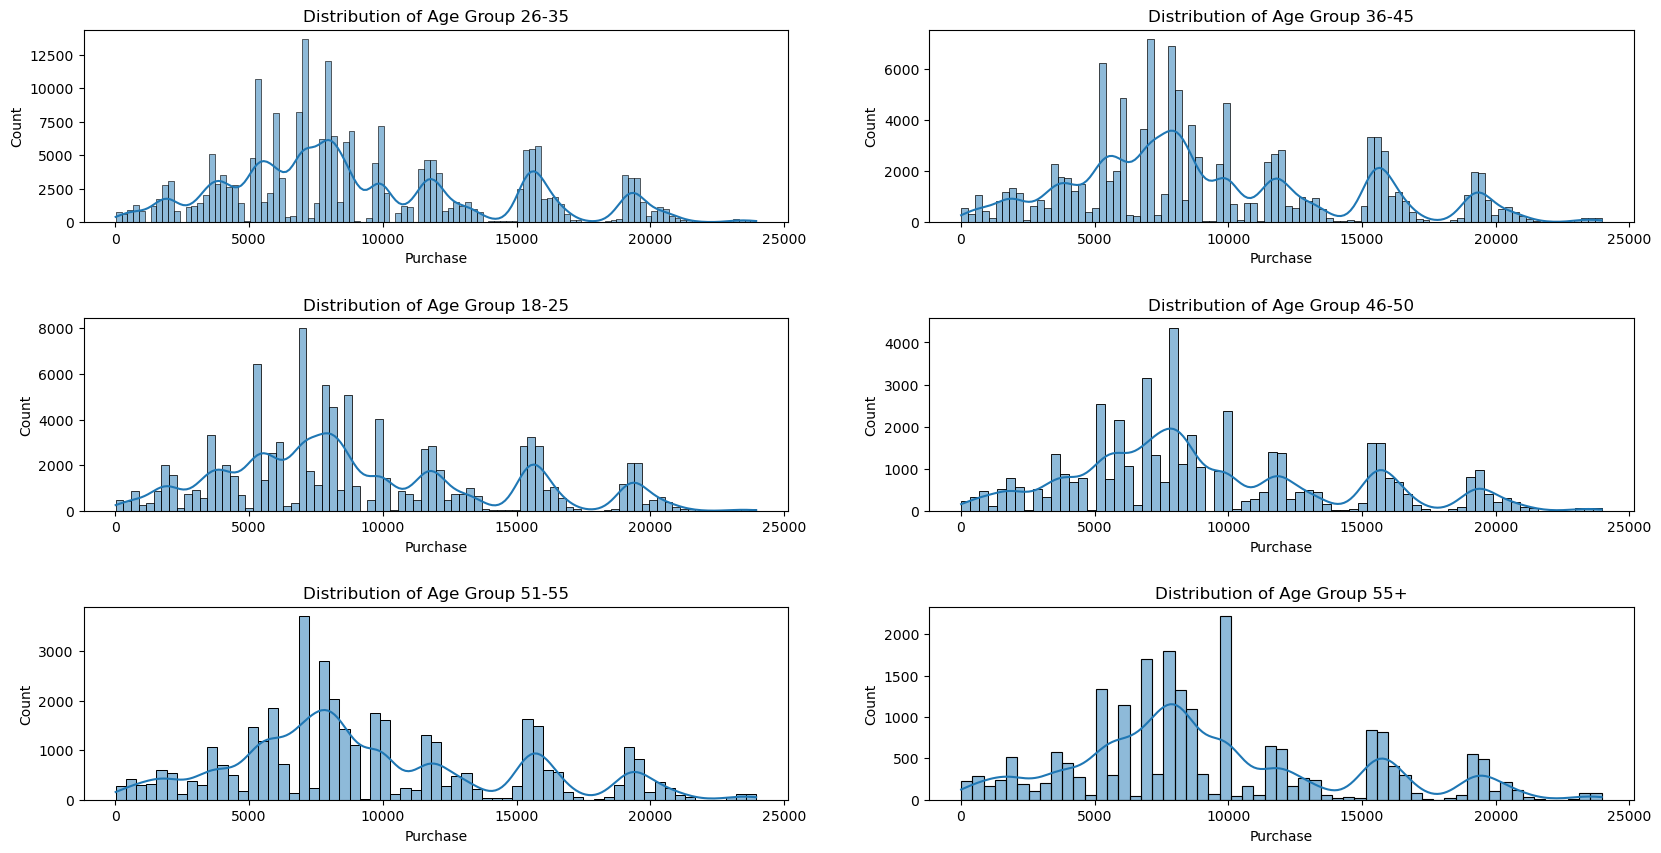

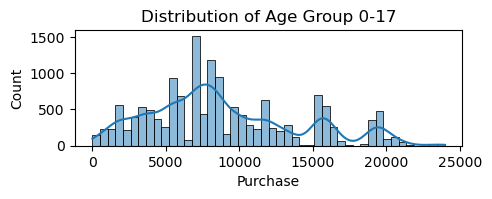

In [213]:
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(20, 10))

#histogram for the population distribution for all age groups

sns.histplot(group["26-35"]["Purchase"],ax = axs[0,0],kde=True).set_title("Distribution of Age Group 26-35")
sns.histplot(group["36-45"]["Purchase"],ax = axs[0,1],kde=True).set_title("Distribution of Age Group 36-45")
sns.histplot(group["18-25"]["Purchase"],ax = axs[1,0],kde=True).set_title("Distribution of Age Group 18-25")
sns.histplot(group["46-50"]["Purchase"],ax = axs[1,1],kde=True).set_title("Distribution of Age Group 46-50")
sns.histplot(group["51-55"]["Purchase"],ax = axs[2,0],kde=True).set_title("Distribution of Age Group 51-55")
sns.histplot(group["55+"]["Purchase"],ax = axs[2,1],kde=True).set_title("Distribution of Age Group 55+")

fig.subplots_adjust(hspace=0.5)
plt.show()

plt.figure(figsize=(5, 1.5))
sns.histplot(group["0-17"]["Purchase"],kde=True).set_title("Distribution of Age Group 0-17")
plt.show()

### Sampling for size n =5000

In [219]:
#age group 26-35 sampling n =5000 and 1000times
age_2635 = [np.mean(group["26-35"]["Purchase"].sample(5000)) for i in range(1000)]
age_2635[0:10]

[9155.5918,
 9239.0172,
 9399.1652,
 9238.9778,
 9364.8872,
 9311.169,
 9181.536,
 9267.4412,
 9258.2478,
 9394.8296]

In [220]:
#age group 36-45 sampling n =5000 and 1000times
age_3645 = [np.mean(group["36-45"]["Purchase"].sample(5000)) for i in range(1000)]
age_3645[0:10]

[9402.9246,
 9452.3538,
 9273.7746,
 9368.1586,
 9352.704,
 9394.5758,
 9277.0132,
 9397.3086,
 9305.209,
 9277.923]

In [221]:
#age group 18-25 sampling n =5000 and 1000times
age_1825 = [np.mean(group["18-25"]["Purchase"].sample(5000)) for i in range(1000)]
age_1825[0:10]

[9049.3574,
 9188.7034,
 9310.5994,
 9320.5552,
 9046.0936,
 9170.6542,
 9031.132,
 9078.3002,
 9331.9158,
 9220.1406]

In [224]:
#age group 46-50 sampling n =5000 and 1000times
age_4650 = [np.mean(group["46-50"]["Purchase"].sample(5000)) for i in range(1000)]
age_4650[0:10]

[9330.743,
 9225.9222,
 9203.6548,
 9244.7906,
 9115.7938,
 9222.6674,
 9196.9882,
 9160.4492,
 9141.2738,
 9196.965]

In [225]:
#age group 51-55 sampling n =5000 and 1000times
age_5155 = [np.mean(group["51-55"]["Purchase"].sample(5000)) for i in range(1000)]
age_5155[0:10]

[9514.0864,
 9572.6408,
 9510.9136,
 9507.7776,
 9557.5704,
 9591.981,
 9537.7278,
 9491.376,
 9499.0526,
 9535.1184]

In [226]:
#age group 55+ sampling n =5000 and 1000times
age_55 = [np.mean(group["55+"]["Purchase"].sample(5000)) for i in range(1000)]
age_55[0:10]

[9367.4926,
 9233.3646,
 9280.8562,
 9130.0802,
 9310.0142,
 9205.857,
 9219.565,
 9373.265,
 9282.3238,
 9319.5246]

In [227]:
#age group 0-17 sampling n =5000 and 1000times
age_017 = [np.mean(group["0-17"]["Purchase"].sample(5000)) for i in range(1000)]
age_017[0:10]

[8971.3594,
 8905.5094,
 8933.53,
 8862.4678,
 8918.8552,
 8980.0642,
 9003.3178,
 8938.3536,
 9004.4908,
 8993.2206]

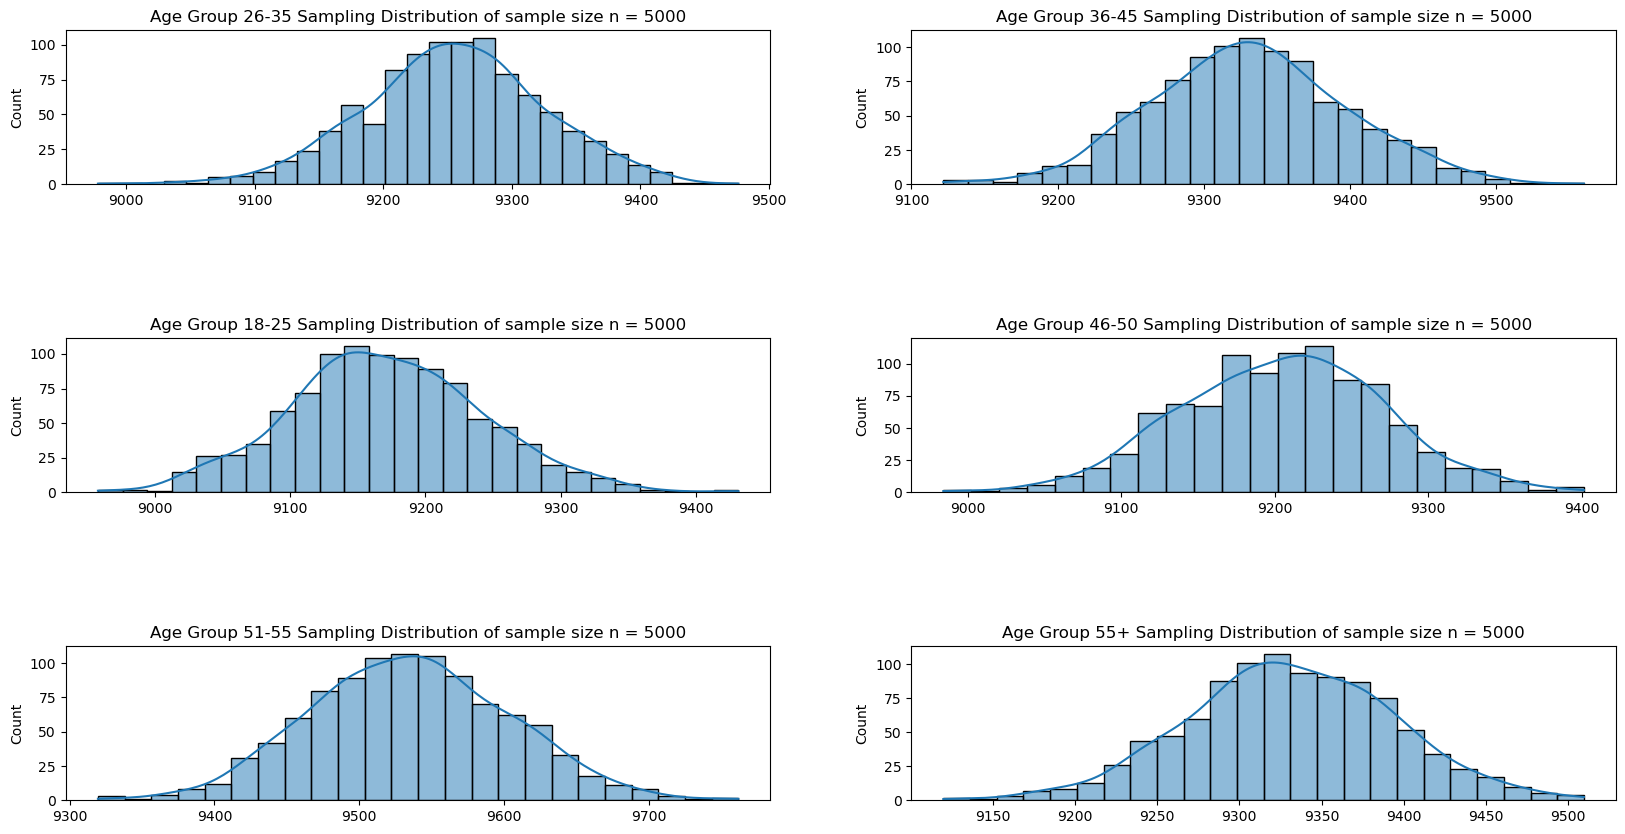

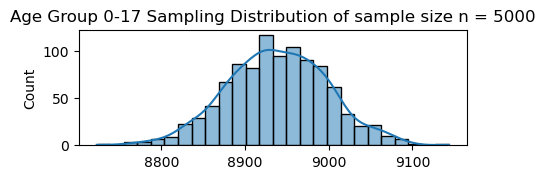

In [233]:
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(20,10))
sns.histplot(age_2635,kde=True, ax=axs[0,0]).set_title("Age Group 26-35 Sampling Distribution of sample size n = 5000")
sns.histplot(age_3645,kde=True, ax=axs[0,1]).set_title("Age Group 36-45 Sampling Distribution of sample size n = 5000")
sns.histplot(age_1825,kde=True, ax=axs[1,0]).set_title("Age Group 18-25 Sampling Distribution of sample size n = 5000")
sns.histplot(age_4650,kde=True, ax=axs[1,1]).set_title("Age Group 46-50 Sampling Distribution of sample size n = 5000")
sns.histplot(age_5155,kde=True, ax=axs[2,0]).set_title("Age Group 51-55 Sampling Distribution of sample size n = 5000")
sns.histplot(age_55,kde=True, ax=axs[2,1]).set_title("Age Group 55+ Sampling Distribution of sample size n = 5000")

fig.subplots_adjust(hspace=1)
plt.show()

plt.figure(figsize=(5, 1.5))
sns.histplot(age_017,kde=True).set_title("Age Group 0-17 Sampling Distribution of sample size n = 5000")
plt.show()


In [234]:
#mean of sampling distribution for all age groups

a2635 = np.mean(age_2635)
print("Age group 26-35 sampling distribution mean = ",np.round(a2635,2))

a3645 = np.mean(age_3645)
print("Age group 36-45 sampling distribution mean = ",np.round(a3645,2))

a1825 = np.mean(age_1825)
print("Age group 18-25 sampling distribution mean = ",np.round(a1825,2))

a4650 = np.mean(age_4650)
print("Age group 46-50 sampling distribution mean = ",np.round(a4650,2))

a5155 = np.mean(age_5155)
print("Age group 51-55 sampling distribution mean = ",np.round(a5155,2))

a55 = np.mean(age_55)
print("Age group 55+ sampling distribution mean = ",np.round(a55,2))

a017 = np.mean(age_017)
print("Age group 0-17 sampling distribution mean = ",np.round(a017,2))


Age group 26-35 sampling distribution mean =  9255.13
Age group 36-45 sampling distribution mean =  9331.0
Age group 18-25 sampling distribution mean =  9171.03
Age group 46-50 sampling distribution mean =  9204.58
Age group 51-55 sampling distribution mean =  9534.99
Age group 55+ sampling distribution mean =  9330.82
Age group 0-17 sampling distribution mean =  8938.5


**Observation**

- For sample size n =5000, the distribution for all age groups follows a normal distribution as per CLT.
- Mean of sampling distribution for al lage groups are now very much near close to the true population mean.
- As we increase the sample size, we see that the distribution of those 5000 samples means is normally distributed. 
- Its evident that purchase spend by age groups is different. 

### CI Confidence 95%

In [236]:
#single sampling for n =5000 and calculating the sample mean for all age groups

ag_2635 = group["26-35"]["Purchase"].sample(5000)
xbar_2635 = ag_2635.mean()

ag_3645 = group["36-45"]["Purchase"].sample(5000)
xbar_3645 = ag_3645.mean()

ag_1825 = group["18-25"]["Purchase"].sample(5000)
xbar_1825 = ag_1825.mean()

ag_4650 = group["46-50"]["Purchase"].sample(5000)
xbar_4650 = ag_4650.mean()

ag_5155 = group["51-55"]["Purchase"].sample(5000)
xbar_5155 = ag_5155.mean()

ag_55 = group["55+"]["Purchase"].sample(5000)
xbar_55 = ag_55.mean()

ag_017 = group["0-17"]["Purchase"].sample(5000)
xbar_017 = ag_017.mean()



print("Random sample mean purchases for age group 26-35 for size n=5000 = ", xbar_2635)
print("Random sample mean purchases for age group 36-45 for size n=5000 = ", xbar_3645)
print("Random sample mean purchases for age group 18-25 for size n=5000 = ", xbar_1825)
print("Random sample mean purchases for age group 46-50 for size n=5000 = ", xbar_4650)
print("Random sample mean purchases for age group 51-55 for size n=5000 = ", xbar_5155)
print("Random sample mean purchases for age group 55+ for size n=5000 = ", xbar_55)
print("Random sample mean purchases for age group 0-17 for size n=5000 = ", xbar_017)

Random sample mean purchases for age group 26-35 for size n=5000 =  9276.6074
Random sample mean purchases for age group 36-45 for size n=5000 =  9346.239
Random sample mean purchases for age group 18-25 for size n=5000 =  9121.4042
Random sample mean purchases for age group 46-50 for size n=5000 =  9308.177
Random sample mean purchases for age group 51-55 for size n=5000 =  9559.7278
Random sample mean purchases for age group 55+ for size n=5000 =  9301.687
Random sample mean purchases for age group 0-17 for size n=5000 =  8920.5706


In [268]:
#calculating the standard error for all age groups
n=5000
se_2635 = std_2635/np.sqrt(n)
se_3645 = std_3645/np.sqrt(n)
se_1825 = std_1825/np.sqrt(n)
se_4650 = std_4650/np.sqrt(n)
se_5155 = std_5155/np.sqrt(n)
se_55 = std_55/np.sqrt(n)
se_017 = std_017/np.sqrt(n)

In [270]:
#calculating the confidence interval for all age groups by taking 95% confidence level

lower_bound, upper_bound = (xbar_2635 + (-1.959)*se_2635, xbar_2635 + (1.959)*se_2635)
print(f"By 95% confident,the confidence interval for age-group 26-35 true population purchase mean is between {np.round(lower_bound,2)} & {np.round(upper_bound,2)}")

lower_bound, upper_bound = (xbar_3645 + (-1.959)*se_3645, xbar_3645 + (1.959)*se_3645)
print(f"By 95% confident,the confidence interval for age-group 36-45 true population purchase mean is between {np.round(lower_bound,2)} & {np.round(upper_bound,2)}")

lower_bound, upper_bound = (xbar_1825 + (-1.959)*se_1825, xbar_1825 + (1.959)*se_1825)
print(f"By 95% confident,the confidence interval for age-group 18-25 true population purchase mean is between {np.round(lower_bound,2)} & {np.round(upper_bound,2)}")

lower_bound, upper_bound = (xbar_4650 + (-1.959)*se_4650, xbar_4650 + (1.959)*se_4650)
print(f"By 95% confident,the confidence interval for age-group 46-50 true population purchase mean is between {np.round(lower_bound,2)} & {np.round(upper_bound,2)}")

lower_bound, upper_bound = (xbar_5155 + (-1.959)*se_5155, xbar_5155 + (1.959)*se_5155)
print(f"By 95% confident,the confidence interval for age-group 51-55 true population purchase mean is between {np.round(lower_bound,2)} & {np.round(upper_bound,2)}")

lower_bound, upper_bound = (xbar_55 + (-1.959)*se_55, xbar_55 + (1.959)*se_55)
print(f"By 95% confident,the confidence interval for age-group 55+ true population purchase mean is between {np.round(lower_bound,2)} & {np.round(upper_bound,2)}")

lower_bound, upper_bound = (xbar_017 + (-1.959)*se_017, xbar_017 + (1.959)*se_017)
print(f"By 95% confident,the confidence interval for age-group 0-17 true population purchase mean is between {np.round(lower_bound,2)} & {np.round(upper_bound,2)}")


By 95% confident,the confidence interval for age-group 26-35 true population purchase mean is between 9137.79 & 9415.42
By 95% confident,the confidence interval for age-group 36-45 true population purchase mean is between 9207.08 & 9485.4
By 95% confident,the confidence interval for age-group 18-25 true population purchase mean is between 8981.93 & 9260.88
By 95% confident,the confidence interval for age-group 46-50 true population purchase mean is between 9170.56 & 9445.79
By 95% confident,the confidence interval for age-group 51-55 true population purchase mean is between 9418.79 & 9700.67
By 95% confident,the confidence interval for age-group 55+ true population purchase mean is between 9162.85 & 9440.53
By 95% confident,the confidence interval for age-group 0-17 true population purchase mean is between 8778.97 & 9062.17


### Recommendations :


- Men spent more money than women. The company can focus on retaining male customers and attracting more male customers.
- Product categories 1, 5, and 8 have the highest purchasing frequency, indicating high demand. The company can focus on promoting and selling more products in these categories.
- Unmarried customers spend more money than married customers. The company should focus on acquiring more unmarried customers.
- Customers aged 26-35 spend more money than other age groups. The company should target the acquisition of customers in this age range.
- There are more customers aged 26-35 in city categories B and A. The company can focus on these cities to increase business.
- Male customers living in City_Category C spend more money than those in B or A. Selling more products in City_Category C can help increase revenue.
- Product categories like 19, 20, and 13 have very low purchases. The company can consider dropping these categories.
- The top 10 users who have purchased the most should be given more offers and discounts to retain them and enhance business.
- The company can offer credit cards or other benefits to customers in occupations that contribute more to sales by partnering with financial institutions.
- The top products should be given special attention to maintain quality and further increase sales.
- Customers who have lived in the city for about a year contributed to 35% of the total purchase amount. The company can focus on this customer base, who are neither too old nor too new residents.
- The highest frequency of purchase orders is between 5k and 10k. The company can focus more on mid-range products to increase sales.